In [1]:
# For local execution (does not require installing the library):
import sys; sys.path.append('../')

# Prettymaps
from prettymaps import *
# Vsketch
import vsketch
# OSMNX
import osmnx as ox
# Matplotlib-related
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from descartes import PolygonPatch
# Shapely
from shapely.geometry import *
from shapely.affinity import *
from shapely.ops import unary_union

c:\ProgramData\Miniconda3\envs\prettymaps\lib\site-packages\prettymaps\fetch.py:317: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  list(lines)
c:\ProgramData\Miniconda3\envs\prettymaps\lib\site-packages\prettymaps\fetch.py:317: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  list(lines)
c:\ProgramData\Miniconda3\envs\prettymaps\lib\site-packages\prettymaps\fetch.py:317: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  list(lines)
c:\ProgramData\Miniconda3\envs\prettymaps\lib\site-packages\prettymaps\fetch.py:317: ShapelyDep

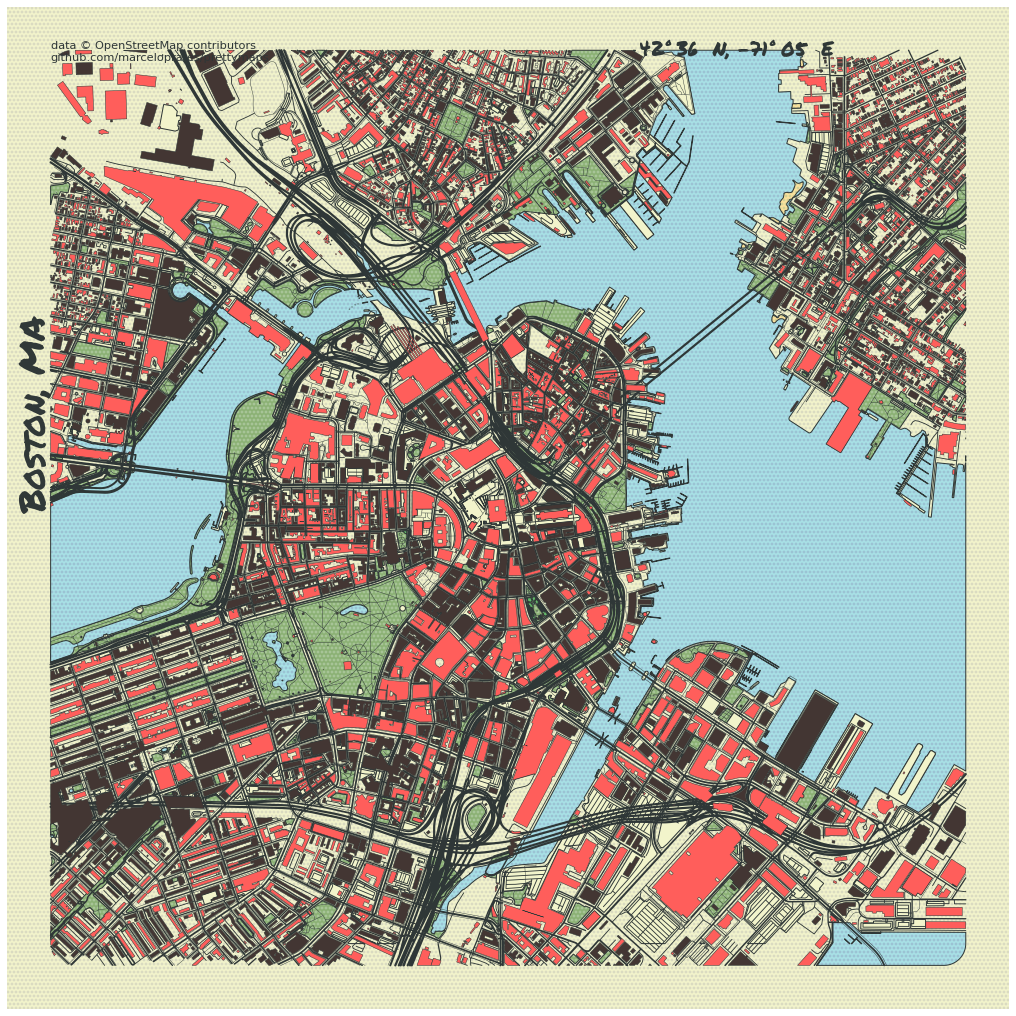

In [2]:
# Style parameters
palette = ['#433633', '#FF5E5B']
background_c = '#F2F4CB'
dilate = 100

# Setup figure
fig, ax = plt.subplots(figsize = (14, 14), constrained_layout = True)

# Plot
layers = plot(
    (42.3604593,-71.0573623), radius = 2000,
    ax = ax,
    layers = {
            'perimeter': {},
            'streets': {
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'cycleway': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                },
                'circle': False, 'dilate': dilate
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': True, 'circle': False, 'dilate': dilate},
            'water': {'tags': {'natural': ['water', 'bay']}, 'circle': False, 'dilate': dilate},
            'forest': {'tags': {'landuse': 'forest'}, 'circle': False, 'dilate': dilate},
            'green': {'tags': {'landuse': ['grass', 'orchard'], 'natural': ['island', 'wood'], 'leisure': 'park'}, 'circle': False, 'dilate': dilate},
            'beach': {'tags': {'natural': 'beach'}, 'circle': False, 'dilate': dilate},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}, 'circle': False}
        },
        drawing_kwargs = {
            'background': {'fc': background_c, 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},
            'perimeter': {'fill': False, 'lw': 0, 'zorder': 0},
            'green': {'fc': '#8BB174', 'ec': '#2F3737', 'hatch_c': '#A7C497', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 2},
            'water': {'fc': '#a8e1e6', 'ec': '#2F3737', 'hatch_c': '#9bc3d4', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
            'beach': {'fc': '#FCE19C', 'ec': '#2F3737', 'hatch_c': '#d4d196', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
            'parking': {'fc': background_c, 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 4},
            'building': {'palette': palette, 'ec': '#2F3737', 'lw': .5, 'zorder': 5},
        },
    osm_credit = {'color': '#2F3737'}
)

# Set bounds
xmin, ymin, xmax, ymax = layers['perimeter'].bounds
dx, dy = xmax-xmin, ymax-ymin
ax.set_xlim(xmin-.06*dx, xmax+.06*dx)
ax.set_ylim(ymin-.06*dy, ymax+.06*dy)

# Draw left text
ax.text(
    xmin-.06*dx, ymin+.5*dy,
    'Boston, MA',
    color = '#2F3737',
    rotation = 90,
    fontproperties = fm.FontProperties(fname = '../assets/Permanent_Marker/PermanentMarker-Regular.ttf', size = 35),
)
# Draw top text
ax.text(
    xmax-.35*dx, ymax+.02*dy,
    "42° 36′ N, -71° 05′ E",
    color = '#2F3737',
    fontproperties = fm.FontProperties(fname = '../assets/Permanent_Marker/PermanentMarker-Regular.ttf', size = 20),
)

plt.savefig('../prints/boston.svg')